In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from torch.autograd import Variable
import torch.nn.functional as F

from torchvision import datasets
from torchvision import transforms

In [0]:
#mean and std deviation and making a transform object
mean=0.1307
std = 0.381
from torchvision import transforms
trans=transforms.Compose([transforms.ToTensor(),transforms.Normalize( (mean,),(std,) ) ]  )

In [3]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x5914c000 @  0x7fde1e5f32a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [6]:
#building testing and training dataset
import torchvision
from torchvision import datasets
traindata=datasets.MNIST('./mnistdata',train=True,transform=trans,download=True)
testdata=datasets.MNIST('./mnistdata',train=True,transform=trans,download=True)


Processing...
Done!


In [7]:
print(type(traindata[0]))
print(type(traindata[1]))

<class 'tuple'>
<class 'tuple'>


In [8]:
example_image=np.array(traindata[12][0])*std+mean
print(example_image.shape)

(1, 28, 28)


3


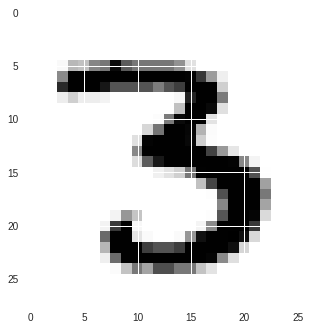

In [9]:
plt.imshow(example_image[0])
labelof12=traindata[12][1]
print(int(labelof12))

In [0]:
#trainig and testing dataloader
batchsize=1024
mnisttrainloader=torch.utils.data.DataLoader(traindata,batch_size=batchsize,shuffle=True,num_workers=2)
mnisttestloader=torch.utils.data.DataLoader(testdata,batch_size=batchsize,shuffle=True,num_workers=2)


In [0]:
#making a neural network
class mnistnet(nn.Module):
  
  def __init__(self):
    super().__init__()
    #conv layer 1
    self.conv1=nn.Conv2d(1,20,kernel_size=5 )
    self.relu1=nn.ReLU()
    #conv layer 2
    self.conv2=nn.Conv2d(20,30,kernel_size=5 )
    self.conv2_drop=nn.Dropout2d(p=0.5)
    self.maxpool2=nn.MaxPool2d(2)
    self.relu2=nn.ReLU()
    #fc layers
    self.fc1=nn.Linear(3000,500)
    self.drop1=nn.Dropout(p=0.5)
    self.fc2=nn.Linear(500,10)
    
    
  def forward(self,x):
    x=self.conv1(x)
    x=self.relu1(x)
    x=self.conv2(x)
    x=self.conv2_drop(x)
    x=self.maxpool2(x)
    x=self.relu2(x)
    
    x=x.view(-1,3000)
    
    x=self.fc1(x)
    x=self.relu1(x)
    x=self.drop1(x)
    op=self.fc2(x)
    
    return op

In [0]:
model=mnistnet()
criteria=nn.CrossEntropyLoss()

import torch.optim as optim
learning_rate=0.01
opt=optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9)

In [28]:
numepochs=100
import sklearn.metrics as acc

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(numepochs):
  iterloss=0
  correct=0
  iteration=0
  
  
  for i, (items ,clas) in enumerate(mnisttrainloader):
    
    items=Variable(items)
    clas=Variable(clas)
    
    opt.zero_grad()
    output=model(items)
    loss=criteria(output,clas)
    iterloss+=loss.data[0]
    loss.backward()
    opt.step()
    
    _,pred= torch.max(output.data,1)
    #print(clas,pred)
    
    correct+=(clas==pred).sum()
    #print(correct,"/",len(clas) )
    
    iteration+=1
    #accu=acc.accuracy_score(clas,pred)
    #print(accu)
    
  train_loss.append(iterloss/iteration)
  train_accuracy.append((100 * correct / len(mnist_train_loader.dataset)))
  
  
  #testing the model for all epochs
  loss=0
  accuracy=0
  iteration=0
  
  model.eval()
  
  for i, (items,clas) in enumerate(mnisttestloader):
    
    items=Variable(items)
    clas=Variable(clas)
    
    output=model(items)
    
    loss += criterion(output , clas).data[0]
    
    _,pred=torch.max(output.data,1)
    correct += (pred==clas).sum()
    
    iteration+=1
    
  test_loss.append(loss/iteration)  
  test_accuracy.append(correct/len(mnisttestloader.dataset) * 100.0)
  
  
  print ('Epoch %d/%d, Tr Loss: %.4f, Tr Acc: %.4f, Val Loss: %.4f, Val Acc: %.4f'
           %(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], 
             test_loss[-1], test_accuracy[-1]))
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


NameError: ignored

In [0]:
f=plt.figure(figsize=(12,8))
plt.plot(train_loss,label='trainloss')
plt.plot(test_loss,label='testloss')
plt.legend()

plt.show()

In [0]:
g=plt.figure(figsize=(12,8))
plt.plot(train_accuracy,label='train_accuracy')
plt.plot(test_accuracy,label='test_accuracy')
plt.legend()
plt.show()

In [2]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x579dc000 @  0x7f4b2c1112a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
